## Time Series EDA

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [2]:
ticker ='TSLA'
tesla_data = yf.download(ticker)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df_tesla=tesla_data

In [4]:
type(df_tesla)

pandas.core.frame.DataFrame

In [5]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600
2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200
2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000
2023-10-09,255.309998,261.359985,252.050003,259.670013,259.670013,101156100


<Axes: xlabel='Date'>

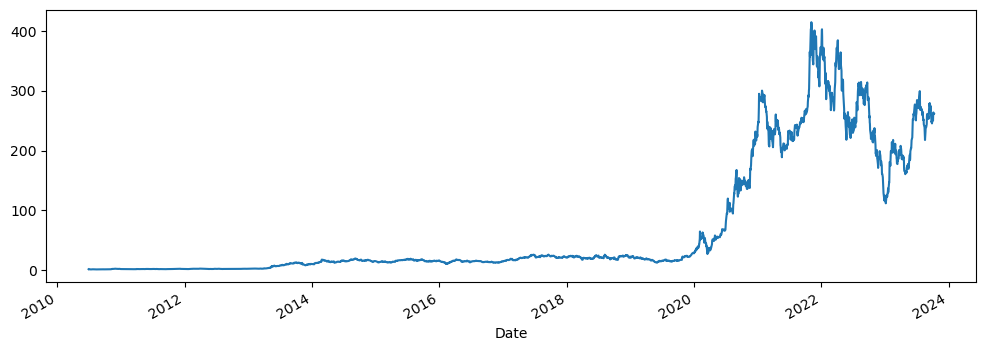

In [6]:
df_tesla['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

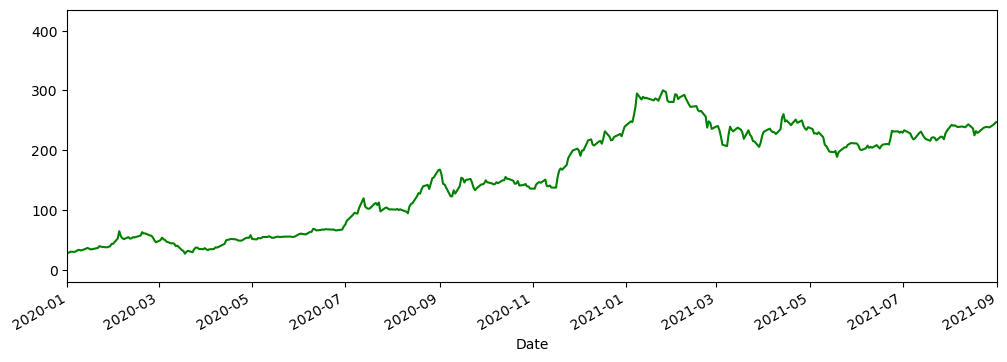

In [7]:
## x limit , y limit and coloring
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2021-09-01')
df_tesla['High'].plot(xlim=(start_date,end_date),figsize=(12,4), c='green')

In [8]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [9]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [10]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

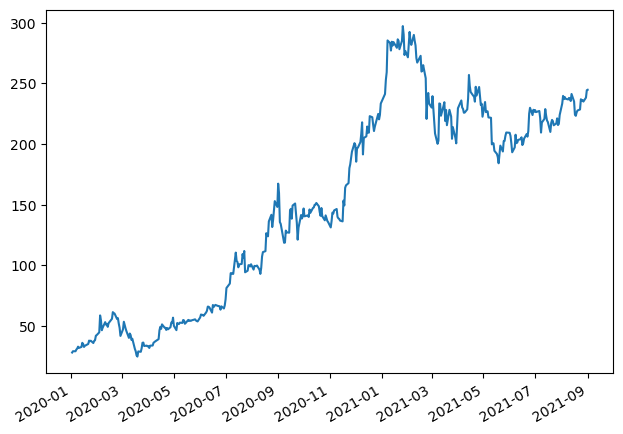

In [12]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [13]:
## Datetime Index

In [14]:
df_tesla=df_tesla.reset_index()

In [15]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3343 non-null   datetime64[ns]
 1   Open       3343 non-null   float64       
 2   High       3343 non-null   float64       
 3   Low        3343 non-null   float64       
 4   Close      3343 non-null   float64       
 5   Adj Close  3343 non-null   float64       
 6   Volume     3343 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 182.9 KB


In [16]:
pd.to_datetime(df_tesla['Date'])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3338   2023-10-03
3339   2023-10-04
3340   2023-10-05
3341   2023-10-06
3342   2023-10-09
Name: Date, Length: 3343, dtype: datetime64[ns]

In [17]:
df_tesla=df_tesla.set_index('Date', drop= True)

In [18]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [19]:
## datetime
from datetime import datetime

In [20]:
 datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [21]:
datetime.now()

datetime.datetime(2023, 10, 10, 20, 27, 16, 143905)

In [27]:
date= datetime(2021,11,21)

In [28]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [30]:
date.date()

datetime.date(2021, 11, 21)

In [31]:
date.day

21

In [32]:
date.weekday()

6

In [33]:
date.year

2021

  ## Time Resampling

In [35]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [37]:
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


In [38]:
df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<Axes: xlabel='Date'>

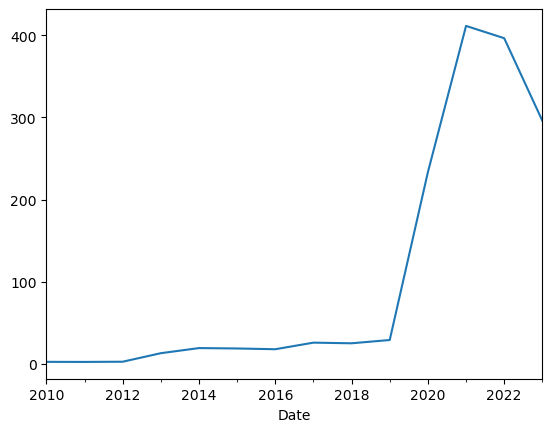

In [41]:
## year end frequency 
df_tesla.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

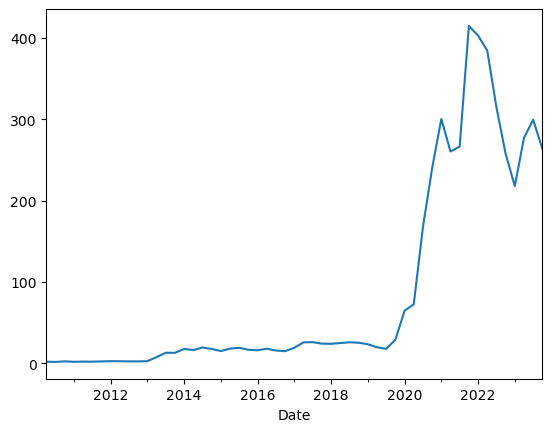

In [44]:
## Quarterly start frequency
df_tesla.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

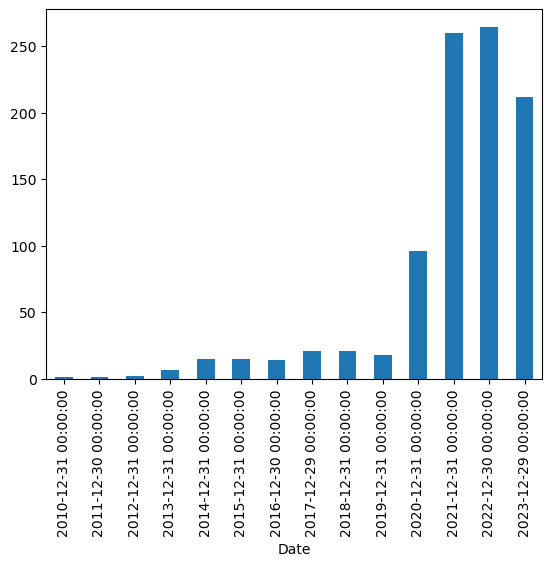

In [50]:
## Business End Frequency
df_tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

<Axes: xlabel='Date'>

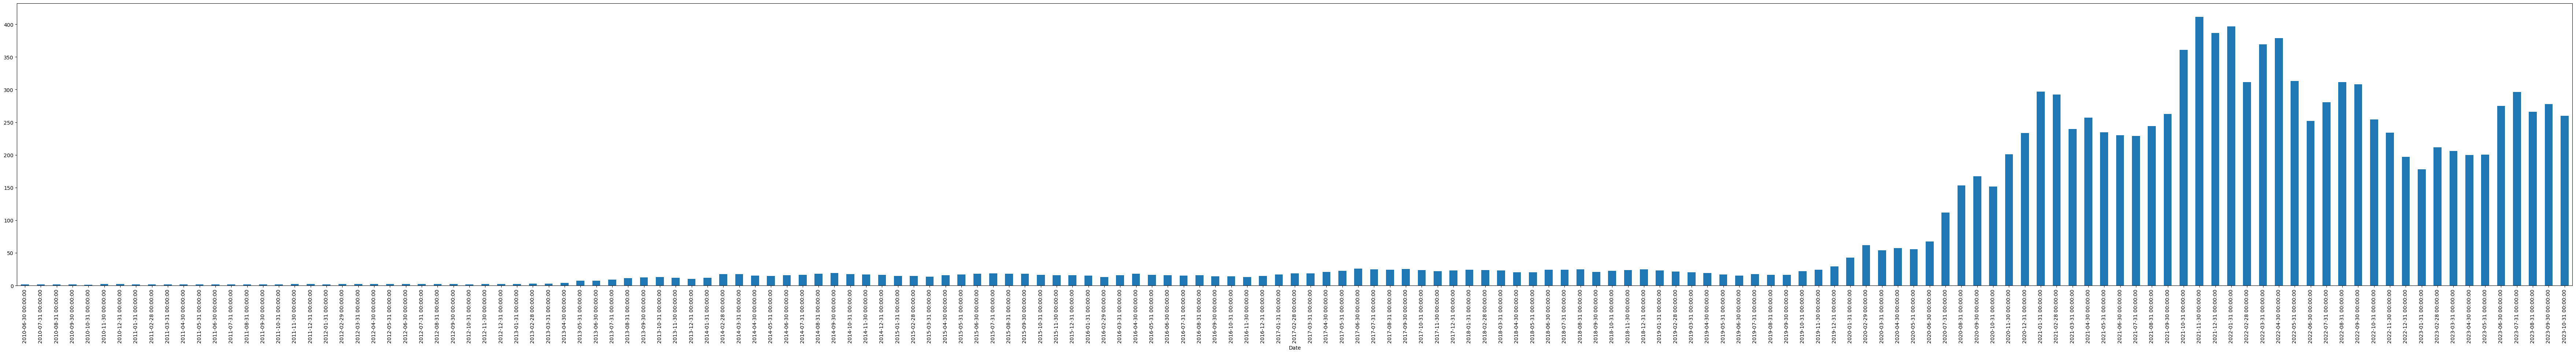

In [56]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar', figsize=(90,10))

In [63]:
df_tesla['High'].rolling(10).mean() 

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2023-10-03    254.118001
2023-10-04    252.911000
2023-10-05    253.185002
2023-10-06    253.571001
2023-10-09    254.996999
Name: High, Length: 3343, dtype: float64

In [61]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [64]:
df_tesla['Open:30 days rolling']= df_tesla['Open'].rolling(30).mean()

In [66]:
df_tesla.head(30)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


<Axes: xlabel='Date'>

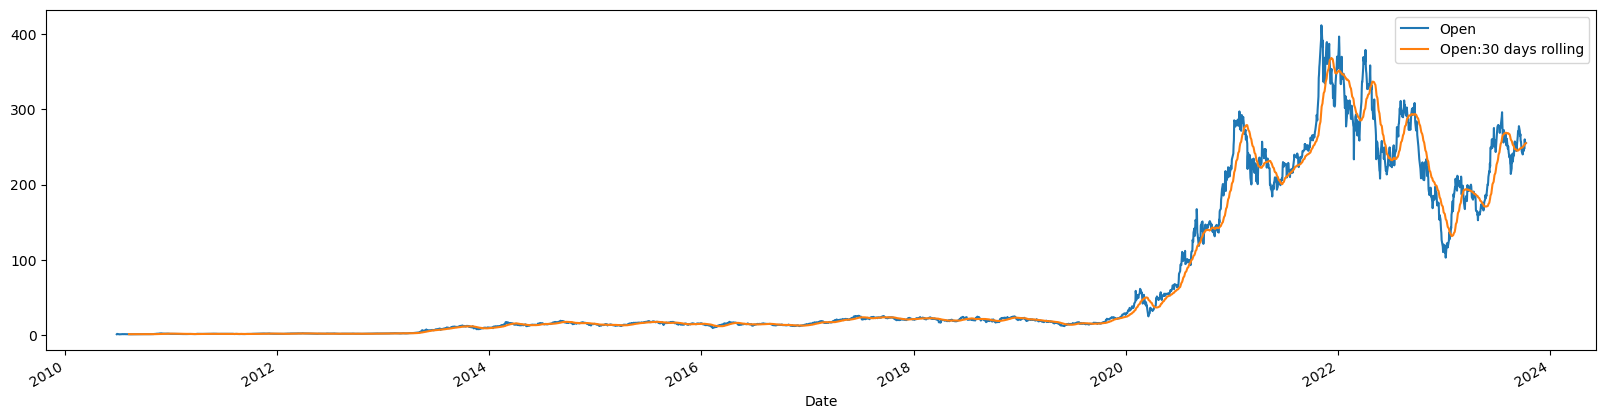

In [71]:
df_tesla[['Open', 'Open:30 days rolling']].plot(figsize=(20,5))

## Assignment
1. Read The Microsoft Data using Pandas Data Reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?

In [102]:
import yfinance as yf

In [103]:
#1. Read The Microsoft Data using Pandas Data Reader

ticker ='MSFT'
start_date='2017-01-01'
end_date='2022-12-31'
msft_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [105]:
df_msft= msft_data

In [106]:
df_msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.254704,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.998531,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.998531,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.492573,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.309586,20382700
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100


In [109]:
#2. Get the maximum price of the share from 2017 to 2022
max_price = df_msft['High'].max()
print('Maximum price of MSFT stock from 2017 to 2022:', max_price)

Maximum price of MSFT stock from 2017 to 2022: 349.6700134277344


In [111]:
# 3. Find the date of the highest price
highest_price_date = df_msft[df_msft['High'] == max_price].index[0]
print("The date of the highest price :", highest_price_date)

The date of the highest price : 2021-11-22 00:00:00


In [115]:
#(verification)
df_msft[df_msft.index=='2021-11-22']['High']

Date
2021-11-22    349.670013
Name: High, dtype: float64

In [118]:
# 4. Find the date of the lowest price
lowest_price_date = df_msft[df_msft['Low']==df_msft['Low'].min()].index[0]
print("The date with the lowest price : ", lowest_price_date)

The date with the lowest price :  2017-01-12 00:00:00
